## Box Plots | Cosmic Object Classification

Box plots are a great way to visualize a numerical variable across a set of discrete classes

#### Import Libraries & Setup Engines

In [1]:
from datetime import datetime as dt 
import numpy as np
import pandas as pd
import sqlalchemy as sql
import matplotlib.pyplot as plt
import seaborn as sns

sql_engine = sql.create_engine('mssql+pyodbc://@localhost')

#### Read SQL table
Let's pull the Sloan Digital Sky Survey data that we got dummies for in the **get_dummies** notebook

In [2]:
table = 'STAR_CLASSIFICATION'

query = f"SELECT * FROM {table}"
df = pd.read_sql_query(query, sql_engine, index_col='obj_ID')
df.head()

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID,GALAXY,QSO,STAR
obj_ID,,,,,,,,,,,,,,,,,,,,
1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171,1,0,0
1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427,1,0,0
1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299,1,0,0
1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775,1,0,0
1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842,1,0,0


#### Here's some information about relevant columns
- alpha = Right Ascension angle (at J2000 epoch)
- r = Red filter in the photometric system
- class = object class (galaxy, star or quasar object)
- redshift = redshift value based on the increase in wavelength
- MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken

### Alpha
It looks like the Right Ascension angle is very consistent across classes

In [6]:
def box(y): 
    plt.figure(figsize=(12,6))
    plt.title(f'{y} Boxplot') 
    sns.boxplot(x='class', y=y, data=df)
    plt.show()

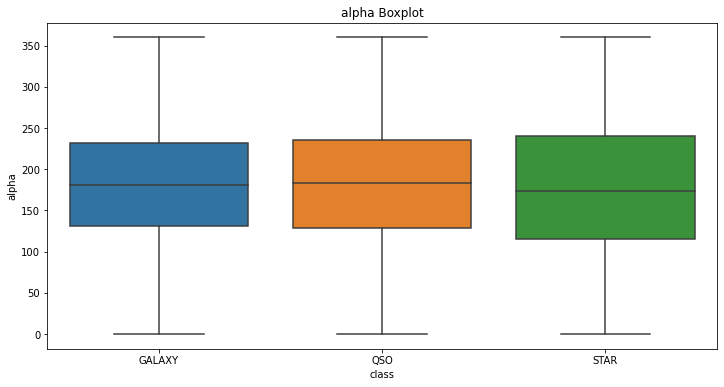

In [7]:
box('alpha')

### Red Filter
The usage of red filter appears to vary mostly for quasars

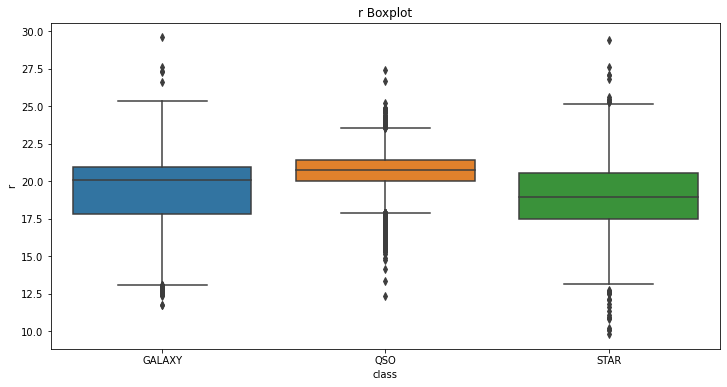

In [10]:
box('r') 

### Redshift
Great seperation for redshift among classes

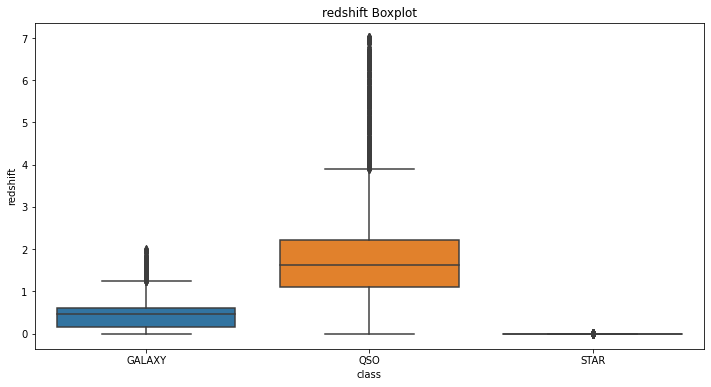

In [13]:
box('redshift') 

### Date
It looks like the average quasar was measured at a later date than the average galaxy and star

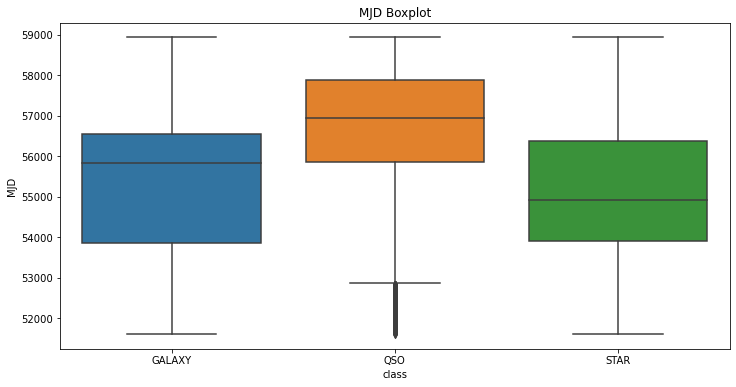

In [14]:
box('MJD') 

We use these boxplots, and some other EDA tools to pick our model feature set in the **feature_selection** notebook.  